<a href="https://colab.research.google.com/github/MashaKubyshina/Learning_to_code/blob/master/PART_3_PREDICTIVE_MODELS_MNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predictive Models**

We will test the following models to see which ones can predict better:

*  Random Forest
*  Support Vector Machine
*  K Nearest Neighbors
*  Multinomial Naïve Bayes
*  Multinomial Logistic Regression
*  Gradient Boosting

In this class project I am following a tutorial from this blog post https://towardsdatascience.com/text-classification-in-python-dd95d264c802

**Process followed:**

1.   Decide which hyperparameters we will use
2.   Define our goal metric: what metric will we use to access the performance of the model
3.   Use Randomized Search Cross Validation to find the hyperparameter that gives us most accuracy
4.   Use Grid Search Cross Validation process in this region to find best combination of hyperparameters
5.   Obtain the accuracy on the training data and the test data, the classification report and the confusion matrix.
6.   Calculate the accuracy of a model with default hyperparameters

There will be one notebook / link for each model


**Multinomial Naïve Bayes** 

In [3]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
# Dataframe
# Open saved data files with Pickle


path_df = "/content/drive/MyDrive/Pickles/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "/content/drive/MyDrive/Pickles/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "/content/drive/MyDrive/Pickles/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "/content/drive/MyDrive/Pickles/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "/content/drive/MyDrive/Pickles/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [5]:
# check the dimension of the vectors:

print(features_train.shape)
print(features_test.shape)

(1500, 300)
(500, 300)


In [6]:
# Cross Validation for Hyperparameter tunning

# In the case of Multinomial Naïve Bayes, we will not tune any hyperparameter.

mnbc = MultinomialNB()
mnbc

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Model Fit and Performance**

In [7]:
# fit the model to our training data

mnbc.fit(features_train, labels_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [8]:
# get the predictors


mnbc_pred = mnbc.predict(features_test)


In [ ]:
# conditional class probabilites

# mnbc_pred = mnbc.predict_proba(features_test)

In [9]:
# For performance analysis, we will use the confusion matrix, the classification report and the accuracy on both training and test data:

# Training accuracy

print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))

The training accuracy is: 
0.592


In [10]:
# Test accuracy


print("The test accuracy is: ")
print(accuracy_score(labels_test, mnbc_pred))

The test accuracy is: 
0.582


In [11]:
# Classification report


print("Classification report")
print(classification_report(labels_test,mnbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       274
           1       0.00      0.00      0.00       124
           2       0.74      0.17      0.27       102

    accuracy                           0.58       500
   macro avg       0.44      0.39      0.33       500
weighted avg       0.47      0.58      0.46       500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


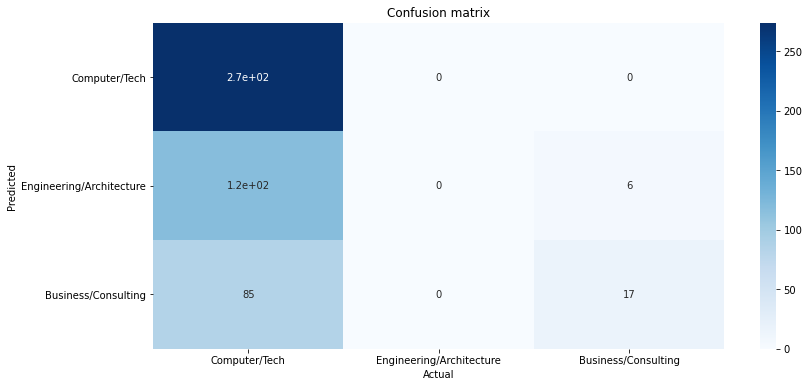

In [13]:
# Confusion matrix

aux_df = df[['category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['category'].values, 
            yticklabels=aux_df['category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [14]:
# Let's see if the hyperparameter tuning process has returned a better model:

d = {
     'Model': 'Multinomial Naïve Bayes',
     'Training Set Accuracy': accuracy_score(labels_train, mnbc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, mnbc_pred)
}

df_models_mnbc = pd.DataFrame(d, index=[0])

In [15]:
df_models_mnbc

,Model,Training Set Accuracy,Test Set Accuracy
0,Multinomial Naïve Bayes,0.592,0.582


In [17]:
with open('/content/drive/MyDrive/Pickles/Models/best_mnbc.pickle', 'wb') as output:
    pickle.dump(mnbc, output)
    
with open('/content/drive/MyDrive/Pickles/Models/df_models_mnbc.pickle', 'wb') as output:
    pickle.dump(df_models_mnbc, output)